### (week4) Classfication iris
> ```aim```
> + 教師あり学習（分類問題）の概観を知る
> + scikit-laernを使い分類を行えるようにする
> + 手法の簡単な比較をする

##### - modules

In [1]:
import numpy as np
import pandas as pd
import sklearn
import itertools

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # 訓練/テスト
from sklearn.preprocessing import StandardScaler # 標準化

# models
from sklearn.neighbors import KNeighborsClassifier # 最近傍法
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.svm import SVC #SVC 
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier # ランダムフォレスト

# evaluations
from sklearn.metrics import accuracy_score # 正解率
from sklearn.metrics import precision_score # 適合率
from sklearn.metrics import recall_score # 再現率
from sklearn.metrics import f1_score # F値
from sklearn.metrics import confusion_matrix # 混合行列
from sklearn.metrics import classification_report # 
from sklearn.model_selection import cross_val_score #CV

# visualizations
import missingno as msg
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
# Data sets
iris = load_iris()
iris_features = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
iris_label = pd.DataFrame(data=iris.target, columns=["Species"])

In [3]:
display(iris_features)
display(iris_label)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#### 【課題1】練習のために特徴量とカテゴリを選択

In [4]:
iris_df = pd.concat([iris_features, iris_label], axis=1)
iris_filter = iris_df["Species"] >= 1
df = iris_df[["sepal_length", "petal_length", "Species"]][iris_filter]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


#### 【問題2】データの分析

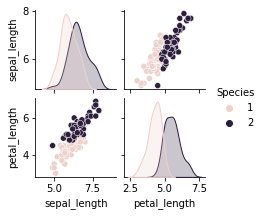

In [5]:
# 散布図行列
sns.pairplot(df, hue="Species", height=1.5)
plt.show()

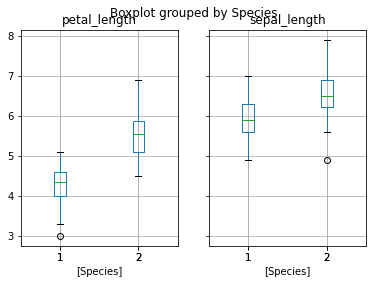

In [6]:
# 箱髭図
df.boxplot(by="Species")
plt.show()

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


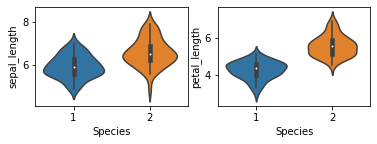

In [7]:
# バイオリン図
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

x = 'Species'
y1,y2 = "sepal_length", "petal_length"

sns.violinplot(x, y1, ax=ax1, data=df)
sns.violinplot(x, y2, ax=ax2, data=df)
plt.show()

#### 【問題3】前処理・訓練データと検証データの分割

In [8]:
# 《注意点》
X = df.drop("Species", axis=1).values
y = df.loc[:, "Species"].values

print("X : {}  {} \ny : {} {}".format(type(X), X.shape, type(y), y.shape))

X : <class 'numpy.ndarray'>  (100, 2) 
y : <class 'numpy.ndarray'> (100,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

print("X_train : {} / X_test : {}".format(X_train.shape, X_test.shape))
print("y_train : {} / y_test : {}".format(y_train.shape, y_test.shape))

X_train : (75, 2) / X_test : (25, 2)
y_train : (75,) / y_test : (25,)


#### 【問題4】前処理・標準化
> ```Cf.```
> + [scikit-learn の fit() / transform() / fit_transform() - Qiita](https://qiita.com/makopo/items/35c103e2df2e282f839a)

In [10]:
sts = StandardScaler()
sts.fit(X_train) # 内部統計を取得
# 実際に書換え
X_train_norm = sts.transform(X_train) 
X_test_norm = sts.transform(X_test)

print('- X_train_fit: {} \n- X_train_norm: {} {}\n- X_test_norm: {} {}'.format(
    type(sts), type(X_train_norm), X_train_norm.shape, type(X_test_norm), X_test_norm.shape))

- X_train_fit: <class 'sklearn.preprocessing._data.StandardScaler'> 
- X_train_norm: <class 'numpy.ndarray'> (75, 2)
- X_test_norm: <class 'numpy.ndarray'> (25, 2)


#### 【問題5】学習と推定
> ```Cf.```
> + [sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [11]:
# k-nearest neighbors (最近傍法)
for i in range(1, 6, 2):
    k_nn = KNeighborsClassifier(n_neighbors = i) #モデルをインスタンス
    k_nn_fit = k_nn.fit(X_train_norm, y_train) #学習
    k_nn_pred = k_nn_fit.predict(X_test_norm) #予測
    print("{}-nn {}: {} {}".format(i, k_nn_pred.shape, k_nn_pred, type(k_nn_pred)))

1-nn (25,): [1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1] <class 'numpy.ndarray'>
3-nn (25,): [1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1] <class 'numpy.ndarray'>
5-nn (25,): [1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1] <class 'numpy.ndarray'>


#### 【問題6】評価
> ```Cf.```
> + [sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation]()
> + [sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation]()
> + [sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation]()
> + [sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation]()
> + [sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation]()

> + [AIは学習後が超大事！ゼロからわかる機械学習モデルの性能評価Part1](https://aizine.ai/confusion-matrix0225/)



In [12]:
# Accuracy（正解率）
#
# -説明-
#     予測結果全体と、答えがどれぐらい一致しているかを判断する指標
#    （TP＋TNが全体に対してどれだけの割合含まれているか…e.g. 癌を癌んと予測(TP) 癌じゃないを癌じゃないと予測(TN)
# ###################
accuracy_score(y_test, k_nn_pred)

0.88

In [13]:
# Precision（適合率）
#
# -説明-
#     TP - FP( False Positive: 偽陽性)間で、FPを低く抑えたい場合に採用する指標
#    （e.g. 癌じゃないを癌と予測。要再検査💉）
# ####################
precision_score(y_test, k_nn_pred)

1.0

In [14]:
# Recall（再現率）
#
# -説明-
#      TP - FN(False Negative : 偽陰性)間で、FNを低く抑えたい場合に採用する指標
#    （e.g. 癌を癌じゃないと予測。 あってはならない💀）
# ###################
recall_score(y_test, k_nn_pred)

0.7692307692307693

In [15]:
# F-score（F値）
#
# -説明-
#     FPとFNはトレードオフの関係にあるので調和平均をとった指標
# ###################
f1_score(y_test, k_nn_pred)

0.8695652173913044

In [16]:
# ConfusionMatrix（混同行列）
confusion_matrix(y_test, k_nn_pred)

array([[10,  3],
       [ 0, 12]])

#### 【問題7】可視化

##### - decision_region() 用意

In [17]:
def decision_region(
    X, y, model, step=0.01, 
    title='decision region', xlabel='xlabel', ylabel='ylabel', 
    target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)　特徴量
    y : ndarray, shape(n_samples,)　　ラベル
    model : object　　　　　　　　　　学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)　　　　  推定値を計算する間隔を設定する
    title : str　                                    グラフのタイトルの文章を与える
    xlabel, ylabel : str　                       軸ラベルの文章を与える
    target_names= : list of str　          凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

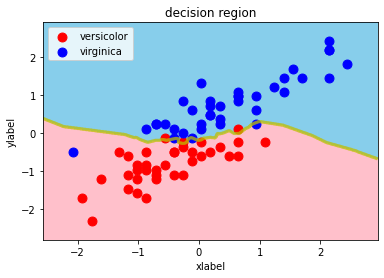

In [18]:
#  k-nearest neighbors (5-nn) - train data
decision_region(X_train_norm, y_train, k_nn)

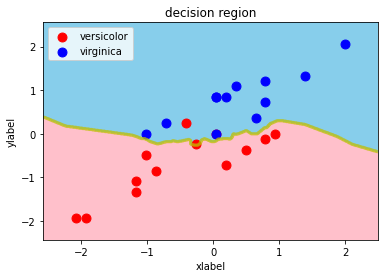

In [19]:
#  k-nearest neighbors (5-nn) - test data
decision_region(X_test_norm, y_test, k_nn)

#### 【問題8】他の手法の学習

##### - evaluations() 自作

In [20]:
def evaluations(test, predict, average):
    accuracy = accuracy_score(test, predict)
    precision = precision_score(test, predict, average=average)
    recall = recall_score(test, predict, average=average)
    f1 = f1_score(test, predict, average=average)
    evaluations = {
        "正解率" : round(accuracy, 3), 
        "適合率" : round(precision, 3),
        "再現率" : round(recall, 3), 
        "F値" : round(f1, 3)
    }
    return evaluations

In [21]:
# 最近坊法
k_nn = KNeighborsClassifier()
k_nn_fit = k_nn.fit(X_train_norm, y_train)
k_nn_pred = k_nn_fit.predict(X_test_norm)
k_nn_ev = evaluations(y_test, k_nn_pred, "macro")

In [22]:
# ロジスティック回帰
logreg = LogisticRegression()
logreg_fit = logreg.fit(X_train_norm, y_train)
logreg_pred = logreg_fit.predict(X_test_norm)
logreg_ev = evaluations(y_test, logreg_pred, "macro")

In [23]:
# SVM
svc = SVC()
svc_fit = svc.fit(X_train_norm, y_train)
svc_pred = svc_fit.predict(X_test_norm)
svc_ev = evaluations(y_test, svc_pred, "macro")

In [24]:
# 決定木
dtc = DecisionTreeClassifier()
dtc_fit = dtc.fit(X_train_norm, y_train)
dtc_pred = dtc.predict(X_test_norm)
dtc_ev = evaluations(y_test, dtc_pred, "macro")

In [25]:
# ランダムフォレスト
rfc = RandomForestClassifier()
rfc_fit = rfc.fit(X_train_norm, y_train)
rfc_pred = rfc_fit.predict(X_test_norm)
rfc_ev = evaluations(y_test, rfc_pred , "macro")

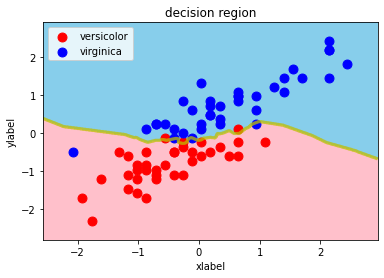

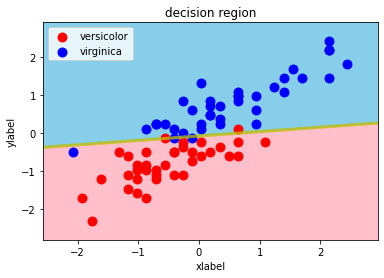

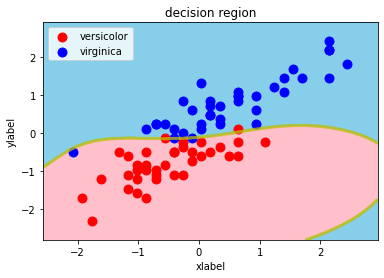

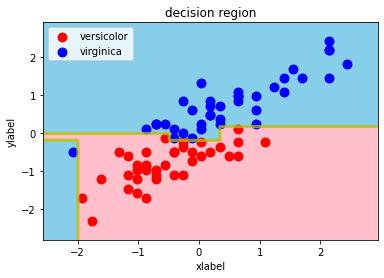

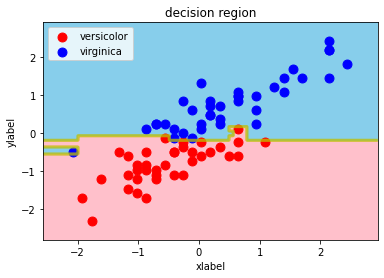

In [26]:
decision_region(X_train_norm, y_train, k_nn)
decision_region(X_train_norm, y_train, logreg)
decision_region(X_train_norm, y_train, svc)
decision_region(X_train_norm, y_train, dtc)
decision_region(X_train_norm, y_train, rfc)

In [28]:
evaluations_df = pd.DataFrame([k_nn_ev, logreg_ev, svc_ev, dtc_ev, rfc_ev],  index = ["最近坊法", "ロジスティック回帰", "SVM", "決定木", "ランダムフォレスト"])
evaluations_df

,正解率,適合率,再現率,F値
最近坊法,0.88,0.900,0.885,0.879
ロジスティック回帰,0.92,0.929,0.923,0.920
SVM,0.92,0.929,0.923,0.920
決定木,0.88,0.900,0.885,0.879
ランダムフォレスト,0.88,0.900,0.885,0.879


> ```(考察)```
>
>      5つのアルゴリズムの内、正解率が高いのは「ロジスティック回帰」「SVC」であった。
>      また、再現率、F値から見てもこの２つが効果的であると言える。

#### 【問題9】（アドバンス課題）標準化の有無の比較
> ```Cf.```
> + [【Python】数量データの正規化 ( 標準化 ) について - Hatena Blog](https://www.st-hakky-blog.com/entry/2017/12/11/200046)
> + [正規化 標準化(機械学習)の理由,必要性,メリットと元に戻す(逆変換)方法をPythonで解説【ディープラーニング,ニューラルネットワーク】 - 9が好きな人のブログ](https://nine-num-98.blogspot.com/2019/12/ai-normalization.html)
> + [6-2. データを標準化してみよう - 統計WEB](https://bellcurve.jp/statistics/course/19647.html)

In [29]:
# 最近坊法（標準化：無）
k_nn = KNeighborsClassifier()
k_nn_fit = k_nn.fit(X_train, y_train)
k_nn_pred = k_nn_fit.predict(X_test)
k_nn_ev = evaluations(y_test, k_nn_pred, "macro")

In [30]:
# ロジスティック回帰（標準化：無）
logreg = LogisticRegression()
logreg_fit = logreg.fit(X_train, y_train)
logreg_pred = logreg_fit.predict(X_test)
logreg_ev = evaluations(y_test, logreg_pred , "macro")

In [31]:
# SVM（標準化：無）
svc = SVC()
svc_fit = svc.fit(X_train, y_train)
svc_pred = svc_fit.predict(X_test)
svc_ev = evaluations(y_test, svc_pred, "macro")

In [32]:
# 決定木（標準化：無）
dtc = DecisionTreeClassifier()
dtc_fit = dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_ev = evaluations(y_test, dtc_pred , "macro")

In [33]:
# ランダムフォレスト（標準化：無）
rfc = RandomForestClassifier()
rfc_fit = rfc.fit(X_train, y_train)
rfc_pred = rfc_fit.predict(X_test)
rfc_ev = evaluations(y_test, rfc_pred , "macro")

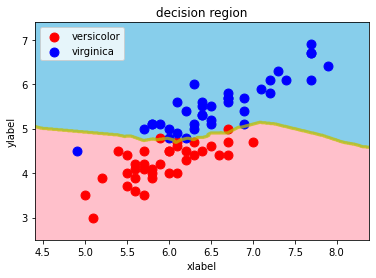

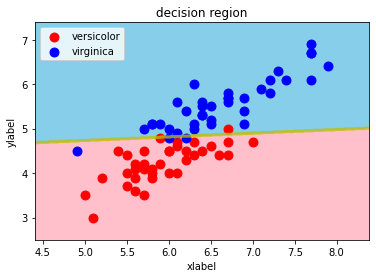

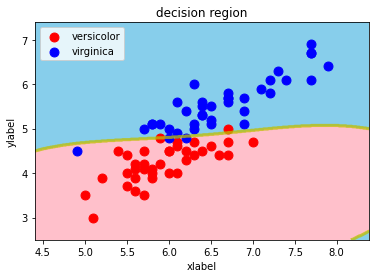

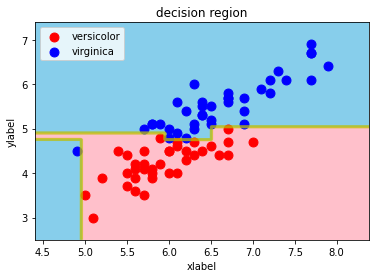

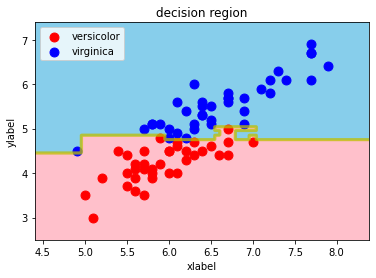

In [34]:
decision_region(X_train, y_train, k_nn)
decision_region(X_train, y_train, logreg)
decision_region(X_train, y_train, svc)
decision_region(X_train, y_train, dtc)
decision_region(X_train, y_train, rfc)

In [35]:
evaluations_df = pd.DataFrame([k_nn_ev, logreg_ev, svc_ev, dtc_ev, rfc_ev],  index = ["最近傍法", "ロジスティック回帰", "SVM", "決定木", "ランダムフォレスト"])
evaluations_df

,正解率,適合率,再現率,F値
最近傍法,0.92,0.929,0.923,0.920
ロジスティック回帰,0.88,0.900,0.885,0.879
SVM,0.92,0.929,0.923,0.920
決定木,0.84,0.847,0.843,0.840
ランダムフォレスト,0.84,0.875,0.846,0.838


> ```(考察)```
>
>      5つのアルゴリズムの内、正解率が高いのは「最近傍法」「SVM」であった。
>      また、再現率、F値から見てもこの２つが効果的であると言える。
>
>      標準化をしない値（以下a）での結果では、標準化をした結果(以下b)とは異なる数字を導き出した。
>      特筆すべきは、bでは「ロジスティック回帰」が効果を発揮したが、aでは「最近傍法」が効果を発揮した。
>      標準化が機械学習の前処理として用いられるのは、単にデータを小さくする処理を行うのではなく、
>      上述のように、データの本来の重みをきちんと見極めるために行うのである。
>
>>       e.g. ある学校でのテスト結果でA君は数学78点、物理６３点だった。何方の点数が良いだろうか？
>>            単純に、二科目の比較ならば、数学だが、そのクラスでの平均点は、数学７5点、物理３８点だった。
>>            こうなると、数学のテストはほぼ平均に近く、物理は平均点を大きく上回っている。
>>            つまり、数学のテストは簡単で、物理は難しいテストだったことを容易に想像できる。
>>            このように表面的な数字を見るのではなく、数字の重みを見て本来の意味を掴むために標準化を用いる。

#### 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法

##### - dataset

In [48]:
# dataset
iris_df = pd.concat([iris_features, iris_label], axis=1)
display(iris_df)
df = iris_df[["sepal_length", "petal_length", "Species"]]
display(df)
X = df.drop("Species", axis=1).values
y = df.loc[:, "Species"].values
print(type(X), X.shape, type(y), y.shape)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


<class 'numpy.ndarray'> (150, 2) <class 'numpy.ndarray'> (150,)


In [49]:
# 学習データ、テストデータ用意
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

print("X_train : {} / X_test : {}".format(X_train.shape, X_test.shape))
print("y_train : {} / y_test : {}".format(y_train.shape, y_test.shape))

X_train : (112, 2) / X_test : (38, 2)
y_train : (112,) / y_test : (38,)


##### - standardization

In [50]:
# 標準化（Standardization）
sts = StandardScaler()
sts.fit(X_train)
X_train_norm = sts.transform(X_train) 
X_test_norm = sts.transform(X_test)

print('- sts : {} \n- X_train_norm: {} {}\n- X_test_norm: {} {}'.format(type(sts), type(X_train_norm), X_train_norm.shape, type(X_test_norm), X_test_norm.shape))

- sts : <class 'sklearn.preprocessing._data.StandardScaler'> 
- X_train_norm: <class 'numpy.ndarray'> (112, 2)
- X_test_norm: <class 'numpy.ndarray'> (38, 2)


##### - algorithm
> ```Cf.```
> + [NumPy配列ndarrayを一次元化（平坦化）するravelとflatten - note.nkmk.me](https://note.nkmk.me/python-numpy-ravel-flatten/)

In [51]:
# 最近坊法
k_nn = KNeighborsClassifier()
k_nn_fit = k_nn.fit(X_train_norm, y_train.ravel())
k_nn_pred = k_nn_fit.predict(X_test_norm)
k_nn_ev = evaluations(y_test, k_nn_pred, average='macro')

In [52]:
# ロジスティック回帰
logreg = LogisticRegression()
logreg_fit = logreg.fit(X_train_norm, y_train.ravel())
logreg_pred = logreg_fit.predict(X_test_norm)
logreg_ev = evaluations(y_test, logreg_pred, average='macro')

In [53]:
# SVM
svc = SVC()
svc_fit = svc.fit(X_train_norm, y_train.ravel())
svc_pred = svc_fit.predict(X_test_norm)
svc_ev = evaluations(y_test, svc_pred, average='macro')

In [54]:
# 決定木
dtc = DecisionTreeClassifier()
dtc_fit = dtc.fit(X_train_norm, y_train.ravel())
dtc_pred = dtc.predict(X_test_norm)
dtc_ev = evaluations(y_test, dtc_pred, average='macro')

In [55]:
# ランダムフォレスト
rfc = RandomForestClassifier()
rfc_fit = rfc.fit(X_train_norm, y_train.ravel())
rfc_pred = rfc_fit.predict(X_test_norm)
rfc_ev = evaluations(y_test, rfc_pred, average='macro')

##### - consideration

In [59]:
def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue', 'yellow']
    contourf_color = ['pink', 'skyblue', 'green']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(
            np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
            np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

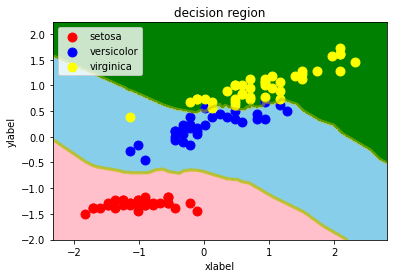

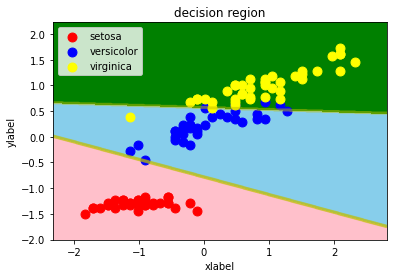

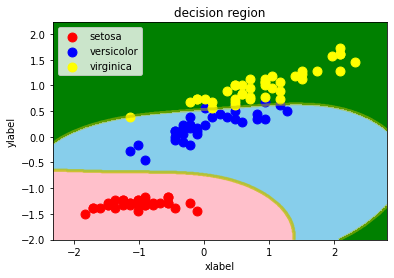

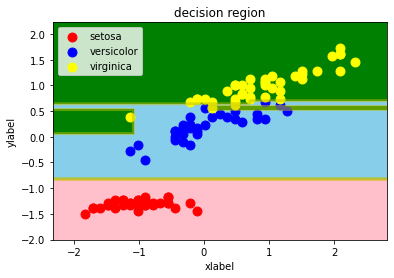

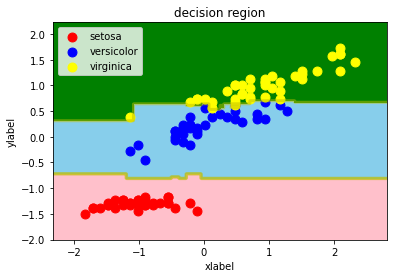

In [62]:
decision_region2(X_train_norm, y_train, k_nn)
decision_region2(X_train_norm, y_train.ravel(), logreg)
decision_region2(X_train_norm, y_train.ravel(), svc)
decision_region2(X_train_norm, y_train.ravel(), dtc)
decision_region2(X_train_norm, y_train.ravel(), rfc)

In [63]:
evaluations_df = pd.DataFrame([k_nn_ev, logreg_ev, svc_ev, dtc_ev, rfc_ev], index = ["最近傍法", "ロジスティック回帰", "SVM", "決定木", "ランダムフォレスト"])
evaluations_df

,正解率,適合率,再現率,F値
最近傍法,0.947,0.942,0.942,0.942
ロジスティック回帰,0.947,0.939,0.958,0.944
SVM,0.947,0.942,0.942,0.942
決定木,0.895,0.884,0.884,0.884
ランダムフォレスト,0.921,0.919,0.905,0.911
